In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

/Users/zico5288/opt/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
regression = pd.read_csv(os.path.join(os.getcwd(), 'data', 'regression_part1.csv'))

(a)

In [3]:
print(regression.describe())
print(regression.info())
print(regression.shape)

       revision_time  exam_score
count      50.000000   50.000000
mean       22.220020   49.919860
std        13.986112   20.925594
min         2.723000   14.731000
25%         8.570500   32.125000
50%        21.688000   47.830500
75%        32.257500   65.069750
max        48.011000   94.945000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
revision_time    50 non-null float64
exam_score       50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes
None
(50, 2)


(b)

In [163]:
# function
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept= False)
revision_time_train = regression.loc[:, ['revision_time']].values
exam_score_train = regression.loc[:, ['exam_score']].values
w1 = np.insert(revision_time_train, 0, values = 1, axis = 1)
reg.fit(w1, exam_score_train)
print(format(reg.intercept_,'.20f'))
exam_score_pred = reg.predict(w1)
reg.coef_ = reg.coef_.tolist()
reg.coef_[0]

0.00000000000000000000


[17.897680258350174, 1.441140905437971]

(c)

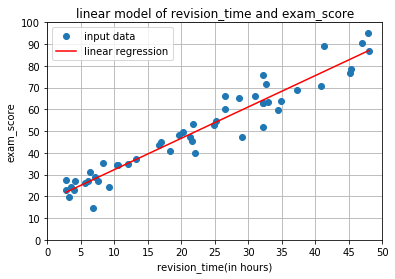

In [178]:

from matplotlib.pyplot import MultipleLocator
regression.plot(x='revision_time', y='exam_score', style='o',label = 'input data')
plt.title('linear model of revision_time and exam_score')
plt.xlabel('revision_time(in hours)')
plt.ylabel('exam_score')
plt.plot(revision_time_train, exam_score_pred,'r',label = 'linear regression')
plt.xlim((0,50))
plt.ylim((0,100))
plt.grid()

x_major_locator=MultipleLocator(5)

y_major_locator=MultipleLocator(10)

ax=plt.gca()

ax.xaxis.set_major_locator(x_major_locator)

ax.yaxis.set_major_locator(y_major_locator)

plt.legend()
plt.show()

(d)

In [166]:
time_train = np.insert(regression.loc[:, ['revision_time']].values, 0, values = 1, axis = 1)
score_train = regression.loc[:, ['exam_score']].values
a = (np.linalg.inv(time_train.transpose().dot(time_train)))
w = a.dot(time_train.transpose()).dot(score_train)
print(w[0])
print(w[1])
pre = w[0] + regression.loc[:, ['revision_time']].values * w[1]
w = w.tolist()
w

[17.89768026]
[1.44114091]


[[17.897680258350192], [1.4411409054379702]]

(e)

In [134]:
MSE = \frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2

Limitations:
MSE could used for evaluating models when they have same number of datas.
However, sometimes it is hard to use MSE to decide whether model is better where each model has different number of datas. 
Calculating MSE is related with the number of datas in dataset. 
For example, when there is a model A has 10000 datas and the MSE of model A is 100. 
Also there is a model B has 1000 datas and the MSE of model B is 80.
Although 80<100, we could not say that the second model is greater than the first one.

SyntaxError: unexpected character after line continuation character (<ipython-input-134-0bfbec21f461>, line 1)

(f)

In [135]:
# exam_score_pred
# MSE = np.sum(np.power(score_train - exam_score_pred, 2))/len(score_train)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(score_train, exam_score_pred)
MSE1 = mean_squared_error(score_train, pre)
print(MSE)
print(MSE1)
MSE == MSE1

30.9854726145413
30.98547261454129


False

In [115]:
differences:

SyntaxError: invalid syntax (<ipython-input-115-3d935dd37db3>, line 1)

(g)

32.48096161535148
83


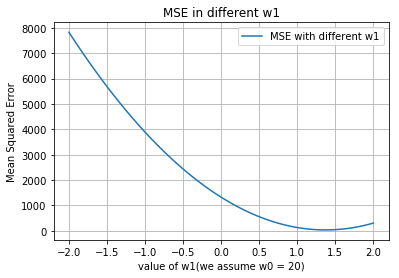

In [170]:
w1 = np.linspace(-2,2,100)
pre = [20 + regression.loc[:, ['revision_time']].values * i for i in w1]
MSE = [np.sum(np.power(score_train - i, 2))/len(score_train) for i in pre]
plt.title('MSE in different w1')
plt.xlabel('value of w1(we assume w0 = 20)')
plt.ylabel('Mean Squared Error')
minimum_index = MSE.index(min(MSE))
minimum = min(MSE)
print(minimum)
print(minimum_index)
w1[MSE.index(min(MSE))]
plt.plot(w1, MSE,label = 'MSE with different w1')
# plt.text(W-0.32,mse1+225,'({}, {})'.format(1.35, 32.48))
plt.grid()
plt.legend()
plt.show()

In [75]:
minimum: 32.48096161535148
minimum_index: 83rd in 100
    
Is this value to be expected?:


SyntaxError: invalid syntax (<ipython-input-75-eee0c9820dd0>, line 2)

In [98]:
MSE -MSE1

1.0658141036401503e-14

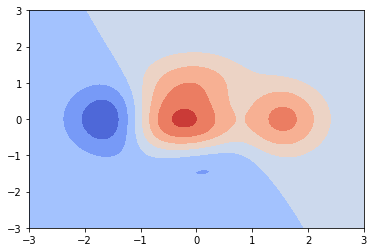

In [31]:
def f(x, y):
     return (1-x/2+x**5+y**3) * np.exp(-x**2-y**2)
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

X, Y = np.meshgrid(x, y)
plt.contourf(X,Y,f(X, Y),cmap='coolwarm')

In [26]:
X.shape

(256, 256)

In [19]:
f(X, Y).shape

(256, 256)

In [22]:
a = np.array([1,2])
a

array([1, 2])

In [27]:
Y.shape

(256, 256)